In [2]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
from bootcampviztools import plot_categorical_relationship_fin, pinta_distribucion_categoricas, plot_grouped_histograms,\
    plot_grouped_boxplots, plot_combined_graphs, plot_categorical_numerical_relationship, bubble_plot,\
        grafico_dispersion_con_correlacion
from scipy.stats import chi2_contingency, mannwhitneyu

In [3]:
df = pd.read_csv("./data/amazon_final.csv")

In [5]:
df.head()

,title,author,genre,rating,price,year,pages,reviews,amazon_year,Language,Categories,Total Pages,Genres,publisher
0,First 100 Words: A Padded Board Book,Roger Priddy,Vocabulary & Spelling,4.7,3..88,2011,24,"38,701 ratings",2015,en,Juvenile Nonfiction,NaN,Non Fiction,Priddy Books US
1,The Life-Changing Magic of Tidying Up: The Jap...,Marie Kondō,"Cleaning, Caretaking & Relocating",4.5,9..42,2017,224,"59,251 ratings",2015,en,House & Home,NaN,Non Fiction,Ten Speed Press
2,Laugh-Out-Loud Jokes for Kids,Rob Elliott,Humorous,4.6,4..64,2022,128,"12,125 ratings",2015,en,Juvenile Nonfiction,NaN,Non Fiction,HarperCollins
3,Secret Garden: An Inky Treasure Hunt and Color...,Johanna Basford,Use of Color,4.7,10..18,2013,96,"15,936 ratings",2015,en,Art,NaN,Non Fiction,National Geographic Books
4,StrengthsFinder 2.0,Gallup,Management,4.1,28..52,2007,175,"8,423 ratings",2015,es,Business & Economics,NaN,Non Fiction,Gallup Press


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   title        656 non-null    object 
 1   author       656 non-null    object 
 2   genre        656 non-null    object 
 3   rating       656 non-null    float64
 4   price        656 non-null    object 
 5   year         656 non-null    int64  
 6   pages        656 non-null    object 
 7   reviews      656 non-null    object 
 8   amazon_year  656 non-null    int64  
 9   Language     654 non-null    object 
 10  Categories   656 non-null    object 
 11  Total Pages  0 non-null      float64
 12  Genres       656 non-null    object 
 13  publisher    656 non-null    object 
dtypes: float64(2), int64(2), object(10)
memory usage: 71.9+ KB


Ok, so from our dataset, we have two columns tha are the same: "pages" and "Total pages", we can drop "Total pages" sibce its empty.
We are also dropping language, I don´t think it adds anything to this analysis so well drop it.

In [4]:
df.drop(axis = 1, columns = ["Total Pages", "Language"], inplace = True )

In [5]:
df.head(60)

,title,author,genre,rating,price,year,pages,reviews,amazon_year,Categories,Genres,publisher
0,First 100 Words: A Padded Board Book,Roger Priddy,Vocabulary & Spelling,4.7,3..88,2011,24,"38,701 ratings",2015,Juvenile Nonfiction,Non Fiction,Priddy Books US
1,The Life-Changing Magic of Tidying Up: The Jap...,Marie Kondō,"Cleaning, Caretaking & Relocating",4.5,9..42,2017,224,"59,251 ratings",2015,House & Home,Non Fiction,Ten Speed Press
2,Laugh-Out-Loud Jokes for Kids,Rob Elliott,Humorous,4.6,4..64,2022,128,"12,125 ratings",2015,Juvenile Nonfiction,Non Fiction,HarperCollins
3,Secret Garden: An Inky Treasure Hunt and Color...,Johanna Basford,Use of Color,4.7,10..18,2013,96,"15,936 ratings",2015,Art,Non Fiction,National Geographic Books
4,StrengthsFinder 2.0,Gallup,Management,4.1,28..52,2007,175,"8,423 ratings",2015,Business & Economics,Non Fiction,Gallup Press
5,Go Set a Watchman: A Novel,Harper Lee,Cultural Heritage,3.8,12..95,2018,288,"54,069 ratings",2015,Fiction,Fiction,Harper
6,Enchanted Forest: An Inky Quest and Coloring b...,Johanna Basford,Coloring Books,4.8,14..19,2015,84,"8,419 ratings",2015,Art,Non Fiction,Laurence King Publishing
7,All the Light We Cannot See,Anthony Doerr,World War II & Holocaust,4.5,12..93,2014,531,"232,435 ratings",2015,Fiction,Fiction,Simon and Schuster
8,The Girl on the Train,Paula Hawkins,Suspense,4.1,12..20,2014,336,"494,411 ratings",2015,Alcoholics,Non Fiction,Random House
9,Adult Coloring Book: Stress Relieving Patterns,Blue Star Coloring,Use of Color,4.5,9..95,2015,96,"4,363 ratings",2015,Art,Non Fiction,Blue Star Press


In [6]:
#Set index as book_id
df.index.name = 'Book_Id'

In [8]:
#Change column names: "genres" to "Themes", "pages" to "Total_Pages"
df.rename(columns={'Genre': 'Theme', 'pages': 'Total_Pages'}, inplace=True)

#Capitalize all columns

df.columns = [col.capitalize() for col in df.columns]
df.columns

Index(['Title', 'Author', 'Theme', 'Rating', 'Price', 'Year', 'Total_pages',
       'Reviews', 'Amazon_year', 'Categories', 'Genres', 'Publisher'],
      dtype='object')

In [9]:
#Remove "ratings" from the column "Reviews"
df['Reviews'] = df['Reviews'].str.replace('ratings', '', regex=False).str.strip()

In [10]:
df.head()

,Title,Author,Theme,Rating,Price,Year,Total_pages,Reviews,Amazon_year,Categories,Genres,Publisher
Book_Id,,,,,,,,,,,,
0,First 100 Words: A Padded Board Book,Roger Priddy,Vocabulary & Spelling,4.7,3..88,2011,24,"38,701",2015,Juvenile Nonfiction,Non Fiction,Priddy Books US
1,The Life-Changing Magic of Tidying Up: The Jap...,Marie Kondō,"Cleaning, Caretaking & Relocating",4.5,9..42,2017,224,"59,251",2015,House & Home,Non Fiction,Ten Speed Press
2,Laugh-Out-Loud Jokes for Kids,Rob Elliott,Humorous,4.6,4..64,2022,128,"12,125",2015,Juvenile Nonfiction,Non Fiction,HarperCollins
3,Secret Garden: An Inky Treasure Hunt and Color...,Johanna Basford,Use of Color,4.7,10..18,2013,96,"15,936",2015,Art,Non Fiction,National Geographic Books
4,StrengthsFinder 2.0,Gallup,Management,4.1,28..52,2007,175,"8,423",2015,Business & Economics,Non Fiction,Gallup Press


In [11]:
#Remove one ".." from the column "Price"
df['Price'] = df['Price'].str.replace('..', '.', regex=False).str.strip()

In [12]:
#Replace "." for "," in Rating and "," for "."" in "Reviews" and in Price
df['Price'] = df['Price'].str.replace('.', ',', regex=False).str.strip()
df['Reviews'] = df['Reviews'].str.replace(',', '.', regex=False).str.strip()

In [13]:
#Covert "Price" and "Rating" to float and "Reviews" to int
df['Rating'] = df['Rating'].astype(str).str.replace(',', '.', regex=False).astype(float)
df['Price'] = df['Price'].astype(str).str.replace(',', '.', regex=False).astype(float)

In [14]:
df['Reviews'] = df['Reviews'].str.replace(r'[^0-9]', '', regex=True).astype(int)

In [15]:
df.head(60)

,Title,Author,Theme,Rating,Price,Year,Total_pages,Reviews,Amazon_year,Categories,Genres,Publisher
Book_Id,,,,,,,,,,,,
0,First 100 Words: A Padded Board Book,Roger Priddy,Vocabulary & Spelling,4.7,3.88,2011,24,38701,2015,Juvenile Nonfiction,Non Fiction,Priddy Books US
1,The Life-Changing Magic of Tidying Up: The Jap...,Marie Kondō,"Cleaning, Caretaking & Relocating",4.5,9.42,2017,224,59251,2015,House & Home,Non Fiction,Ten Speed Press
2,Laugh-Out-Loud Jokes for Kids,Rob Elliott,Humorous,4.6,4.64,2022,128,12125,2015,Juvenile Nonfiction,Non Fiction,HarperCollins
3,Secret Garden: An Inky Treasure Hunt and Color...,Johanna Basford,Use of Color,4.7,10.18,2013,96,15936,2015,Art,Non Fiction,National Geographic Books
4,StrengthsFinder 2.0,Gallup,Management,4.1,28.52,2007,175,8423,2015,Business & Economics,Non Fiction,Gallup Press
5,Go Set a Watchman: A Novel,Harper Lee,Cultural Heritage,3.8,12.95,2018,288,54069,2015,Fiction,Fiction,Harper
6,Enchanted Forest: An Inky Quest and Coloring b...,Johanna Basford,Coloring Books,4.8,14.19,2015,84,8419,2015,Art,Non Fiction,Laurence King Publishing
7,All the Light We Cannot See,Anthony Doerr,World War II & Holocaust,4.5,12.93,2014,531,232435,2015,Fiction,Fiction,Simon and Schuster
8,The Girl on the Train,Paula Hawkins,Suspense,4.1,12.20,2014,336,494411,2015,Alcoholics,Non Fiction,Random House


In [16]:
#Let´s add a space in between words for publisher

df['Publisher'] = df['Publisher'].apply(lambda x: re.sub(r'(?<=[a-z])(?=[A-Z])', ' ', x))

In [17]:
#Ok, so Harper in oublisher is Harper Collins, let´s replace that
df['Publisher'] = df['Publisher'].str.replace(r'Harper\s?Collins', 'Harper Collins', regex=True)
#Group all Penguin, Random House together
df['Publisher'] = df['Publisher'].str.replace(
    r'(?i)\b(penguin.*|random house.*)\b', 'Penguin Random House', regex=True
)





In [18]:
#Replace some publishers that I see are wrong
df.loc[df['Title'].str.contains('atomic habits', case=False, na=False), 'Publisher'] = 'Penguin Random House'
df.loc[df['Title'].str.contains('the house of my mother', case=False, na=False), 'Publisher'] = 'Simon and Schuster'
df.loc[df['Title'].str.contains("Don't Believe Everything You Think", case=False, na=False), 'Publisher'] = 'Authors Equity'




In [19]:
#Correct Authors names
df['Author'] = df['Author'].str.title()

In [20]:
df.tail(60)

,Title,Author,Theme,Rating,Price,Year,Total_pages,Reviews,Amazon_year,Categories,Genres,Publisher
Book_Id,,,,,,,,,,,,
596,The Let Them Theory: A Life-Changing Tool That...,Mel Robbins,Motivation & Self-Improvement,4.6,19.95,2024,336,14454,2025,Self-Help,Non Fiction,"Hay House, Inc"
597,Sunrise on the Reaping (A Hunger Games Novel) ...,Suzanne Collins,Science Fiction,4.8,19.17,2025,400,40696,2025,Juvenile Fiction,Fiction,Scholastic Australia
598,Forgotten Home Apothecary : 250 Powerful Remed...,Dr. Nicole Apelian,Reference,4.7,32.97,2024,288,5178,2025,Non Fiction,Non Fiction,Independently Published
599,Onyx Storm (Deluxe Limited Edition) (The Empyr...,Rebecca Yarros,Epic,4.6,39.09,2025,544,209163,2025,Fiction,Fiction,Alcaraz Ediciones
600,INNER EXCELLENCE: Train Your Mind for Extraord...,Jim Murphy,Medicine & Psychology,4.7,14.99,2020,360,2071,2025,Self-Help,Non Fiction,Hachette UK
601,Atomic Habits: An Easy & Proven Way to Build G...,James Clear,Social Psychology & Interactions,4.8,14.20,2022,320,139885,2025,Non Fiction,Non Fiction,Penguin Random House
602,The Housemaid,Freida Mcfadden,Psychological,4.5,1.99,2022,336,493007,2025,Fiction,Fiction,Suma
603,Girl Moments: Coloring Book for Adults and Tee...,Coco Wyo,Fashion,4.8,7.99,2024,88,4186,2025,Games & Activities,Non Fiction,Turtleback Books
604,Cozy Friends: Coloring Book for Adults and Tee...,Coco Wyo,Animals,4.8,7.99,2024,88,5426,2025,Games & Activities,Non Fiction,Createspace Independent Publishing Platform


Looks good! Let´s check if I have any NaNs

In [21]:
df.isna().mean()*100

Title          0.0
Author         0.0
Theme          0.0
Rating         0.0
Price          0.0
Year           0.0
Total_pages    0.0
Reviews        0.0
Amazon_year    0.0
Categories     0.0
Genres         0.0
Publisher      0.0
dtype: float64

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        656 non-null    object 
 1   Author       656 non-null    object 
 2   Theme        656 non-null    object 
 3   Rating       656 non-null    float64
 4   Price        656 non-null    float64
 5   Year         656 non-null    int64  
 6   Total_pages  656 non-null    object 
 7   Reviews      656 non-null    int64  
 8   Amazon_year  656 non-null    int64  
 9   Categories   656 non-null    object 
 10  Genres       656 non-null    object 
 11  Publisher    656 non-null    object 
dtypes: float64(2), int64(3), object(7)
memory usage: 61.6+ KB


Future Work:

We can preprocess the datasets that are extracted from Amazon. Preprocessing can include the following.

Replacing the missing values if any with the appropriate values.
Removing the duplicated rows.
Taking a note of any unusual values.
Adjusting the outliers as they can hamper the further analysis of the data.

We can analyze the datasets further to check the following.
Which genre is the most popular with highest user ratings?
List of Authors which have top selling books in the multiple genres?
List of Authors having multiple top selling books in the same genre?
Top 10 books with the maximum selling price across all the genres.
What is the trend of star rating and number of user ratings?
Books which have the highest star ratings and highest number of user ratings.



| Columna/Variable | Descripción |
| ---------------- | ----------- |
| Title     | Title of the book|
| Author    | Author of the book |
| Theme   | Recurring themes of the book |
| Rating    | Average rating of the book, by amazon customers |
| Price    | Book price on amazon (in $) |
| Year   | Year it was published |
| Total_pages     | Number of pages in the book|
| Reviews     | Number of reviews for the book  |
| Amazon_year    | Year it was a bestseller on Amazon|
| Categories | Fiction on Non Fiction |
| Genres    | Genre of the book |
| Publisher   | Publishing house for the book |


In [23]:
# Check for duplicate rows (based on all columns)
duplicate_rows = df[df.duplicated()]

# Or check for duplicates based on specific columns (e.g., title + author)
duplicate_titles = df[df.duplicated(subset=["Title", "Author"])]

# See how many there are
print("Total full duplicates:", len(duplicate_rows))
print("Total title-author duplicates:", len(duplicate_titles))

# Show examples
print(duplicate_titles[["Title", "Author"]].head())

Total full duplicates: 0
Total title-author duplicates: 253
                                                     Title        Author
Book_Id                                                                 
61                                     StrengthsFinder 2.0        Gallup
62                    First 100 Words: A Padded Board Book  Roger Priddy
63       The Life-Changing Magic of Tidying Up: The Jap...   Marie Kondō
64                               Oh, the Places You'll Go!     Dr. Seuss
68       The 5 Love Languages: The Secret to Love that ...  Gary Chapman


In [47]:
df.to_csv("amazon_cleaned.csv", index=False)

In [29]:
df_tipificacion = pd.DataFrame([df.nunique(), df.nunique()/len(df) * 100, df.dtypes]).T.rename(columns = {0: "Card",\
                                                                                                                                 1: "%_Card", 2: "Tipo"})
df_tipificacion["Clasificada_como"] = "Categorica" 
df_tipificacion.loc[df_tipificacion.Card == 2, "Clasificada_como"] = "Binaria"
df_tipificacion.loc[df_tipificacion["Card"] > 13, "Clasificada_como"] ="Numerica Discreta"
df_tipificacion.loc[df_tipificacion["%_Card"] > 30, "Clasificada_como"] = "Numerica Continua"
df_tipificacion

,Card,%_Card,Tipo,Clasificada_como
Title,403,61.432927,object,Numerica Continua
Author,298,45.426829,object,Numerica Continua
Theme,231,35.213415,object,Numerica Continua
Rating,12,1.829268,float64,Categorica
Price,332,50.609756,float64,Numerica Continua
Year,56,8.536585,int64,Numerica Discreta
Total_pages,122,18.597561,object,Numerica Discreta
Reviews,418,63.719512,int64,Numerica Continua
Amazon_year,11,1.676829,int64,Categorica
Categories,51,7.77439,object,Numerica Discreta


In [30]:
#ANALISIS UNIVARIANTE

categoricas = ["Rating","Amazon_year","Genres"]
numericas = ["Price","Year", "Total_pages", "Reviews","Categories" "Publisher"]

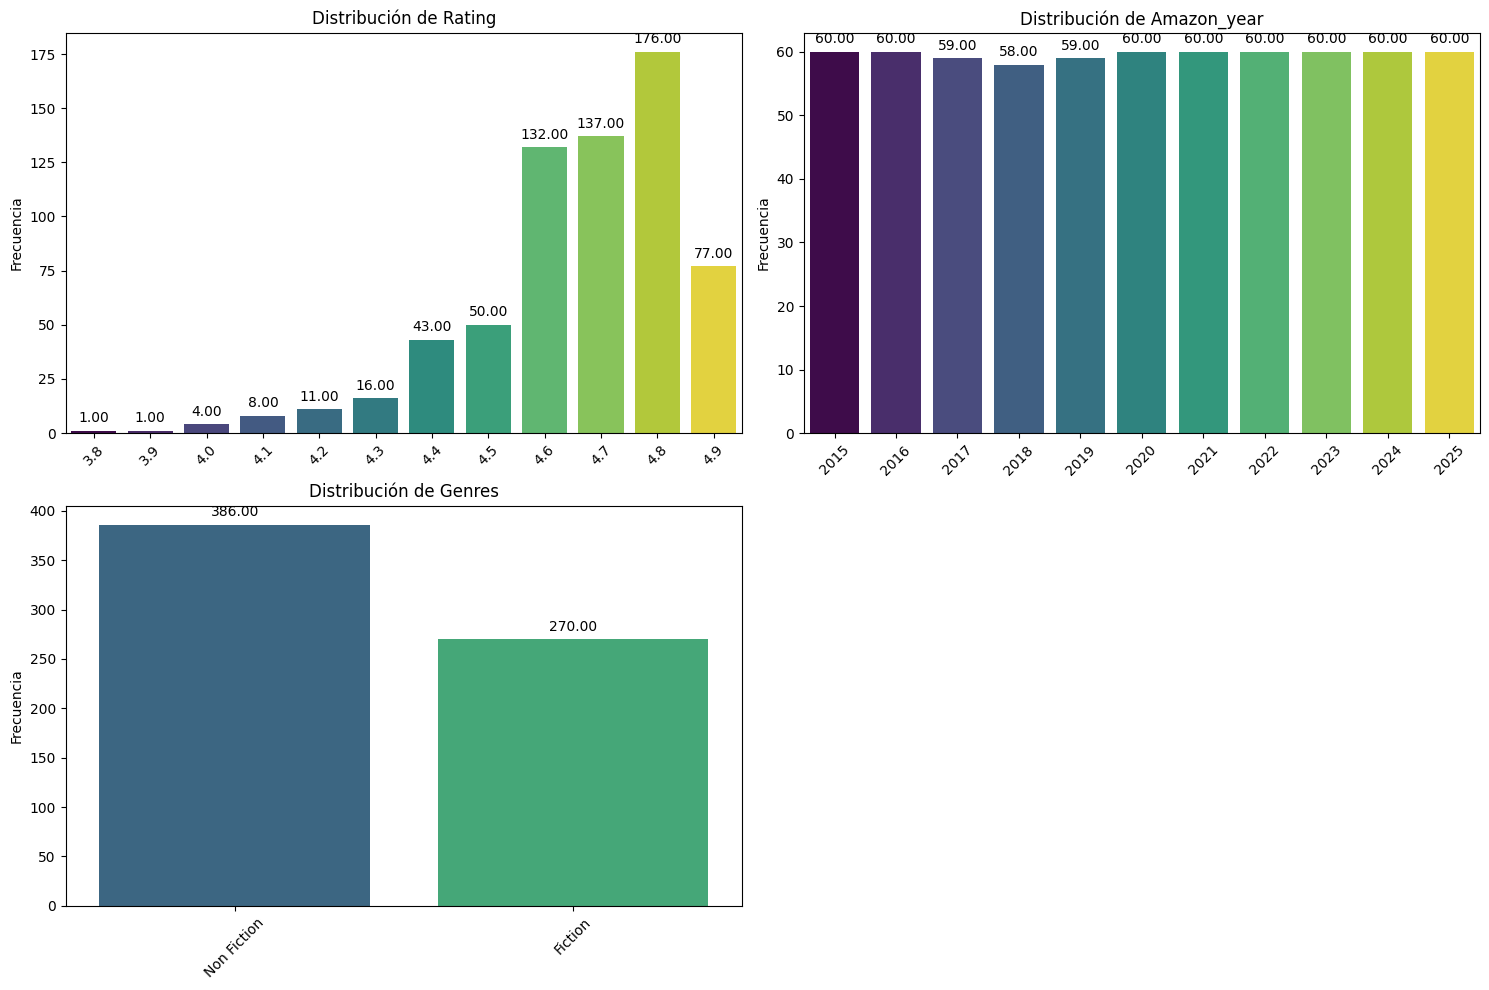

In [32]:
pinta_distribucion_categoricas(df, categoricas, mostrar_valores= True)

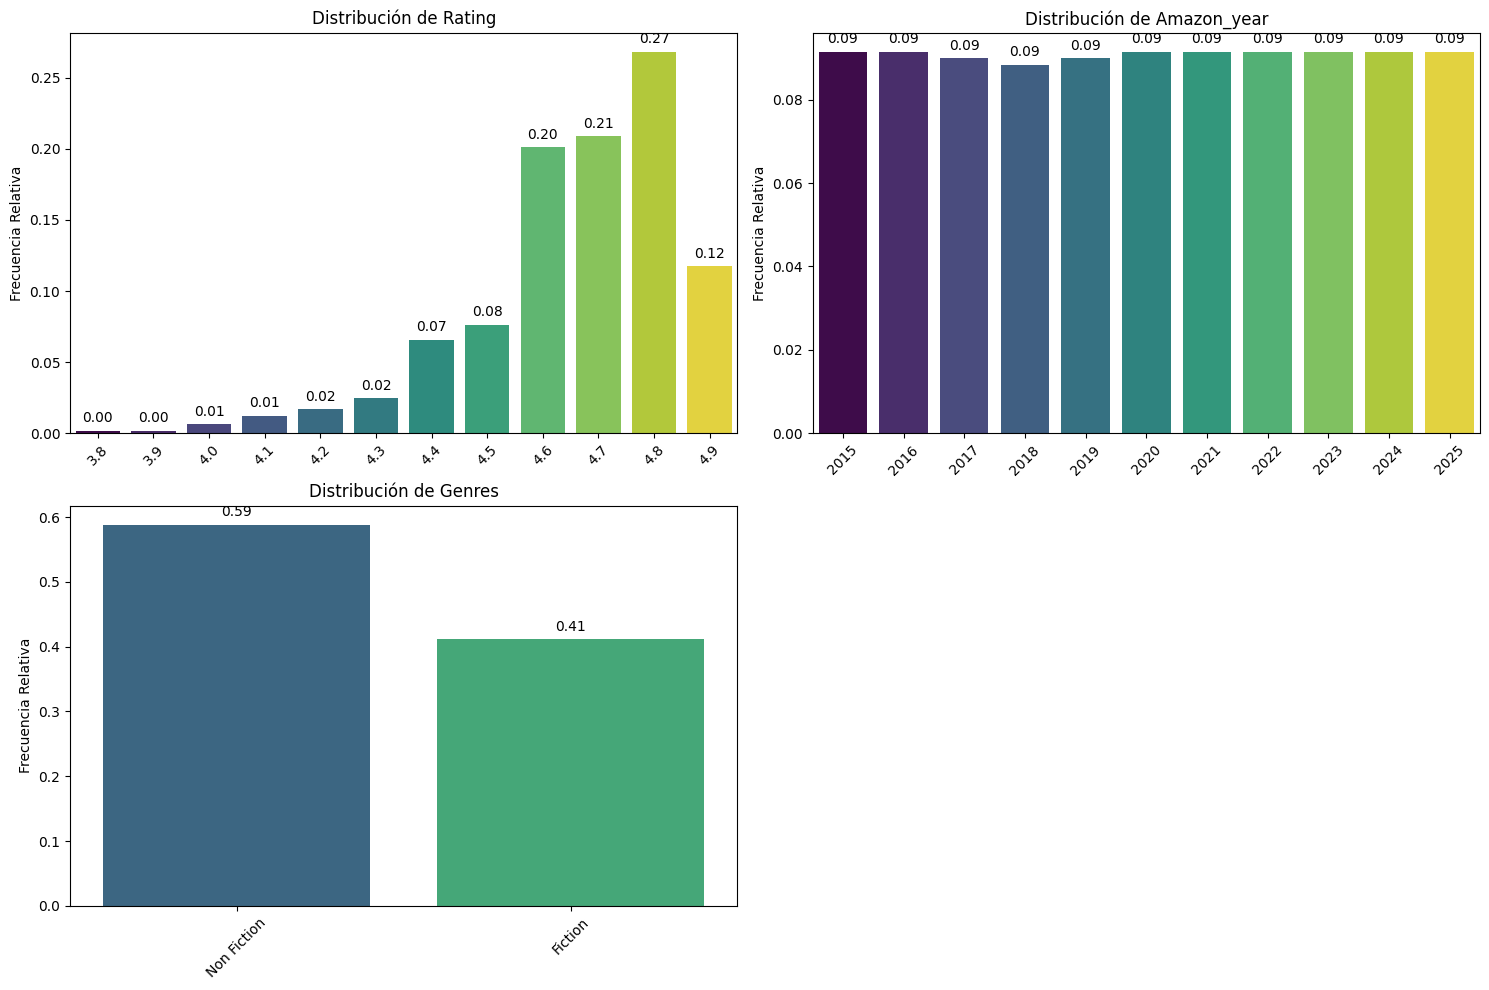

In [34]:

# Analizamos las frecuencias relativas:

pinta_distribucion_categoricas(df, categoricas,relativa= True, mostrar_valores= True)

In [3]:
df[["Price","Rating", "Reviews"]].describe()

,Price,Rating,Reviews
count,656.000000,656.000000,656.000000
mean,11.712759,4.662957,78119.698171
std,6.845434,0.186285,103969.803235
min,1.670000,3.800000,694.000000
25%,7.880000,4.600000,17467.750000
50%,10.050000,4.700000,38983.500000
75%,14.295000,4.800000,90091.250000
max,52.620000,4.900000,634573.000000


In [ ]:


# Calculate Q1 (25th percentile) and Q3 (75th percentile) for Reviews
Q1_reviews = df['Reviews'].quantile(0.25)
Q3_reviews = df['Reviews'].quantile(0.75)
IQR_reviews = Q3_reviews - Q1_reviews

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for Rating
Q1_rating = df['Rating'].quantile(0.25)
Q3_rating = df['Rating'].quantile(0.75)
IQR_rating = Q3_rating - Q1_rating

# Outlier detection
lower_bound_reviews = Q1_reviews - 1.5 * IQR_reviews
upper_bound_reviews = Q3_reviews + 1.5 * IQR_reviews

lower_bound_rating = Q1_rating - 1.5 * IQR_rating
upper_bound_rating = Q3_rating + 1.5 * IQR_rating

# Output the results
print(f"Reviews IQR: {IQR_reviews}")
print(f"Rating IQR: {IQR_rating}")
print(f"Outliers for Reviews: Below {lower_bound_reviews} or Above {upper_bound_reviews}")
print(f"Outliers for Rating: Below {lower_bound_rating} or Above {upper_bound_rating}")

Reviews IQR: 72623.5
Rating IQR: 0.20000000000000018
Outliers for Reviews: Below -91467.5 or Above 199026.5
Outliers for Rating: Below 4.299999999999999 or Above 5.1


(2, 2)


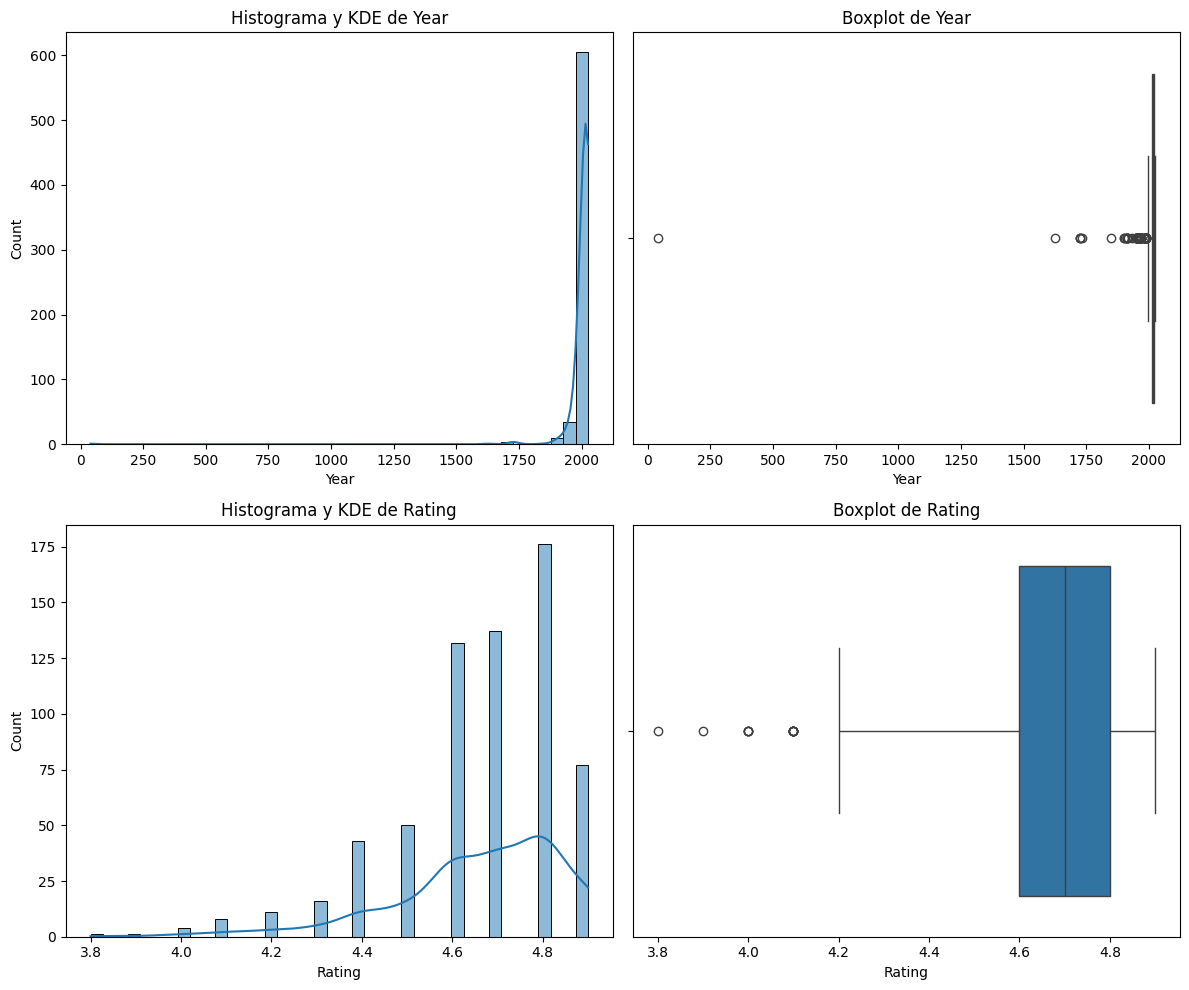

In [46]:
plot_combined_graphs(df, ["Year","Rating"], whisker_width=2, bins = 40)